Import lab and data sets

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import tensorflow as tf
import keras

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten , Dropout
#data = loadmat('mnist-original.mat')

data and pre-process it

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape , y_train.shape , X_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
def plot_input_imp(i):
    plt.imshow(X_train[i] , cmap= 'binary')
    plt.title(y_train[i])
    plt.show()

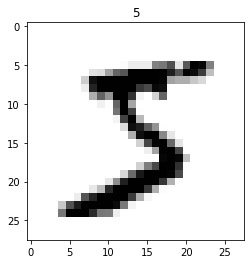

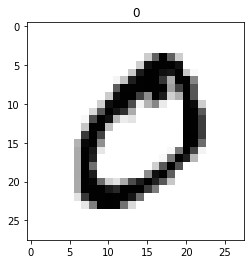

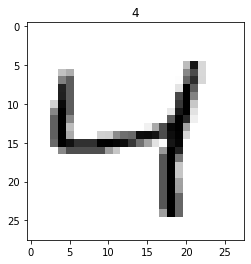

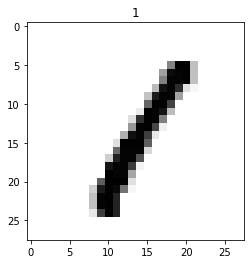

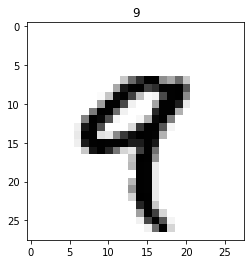

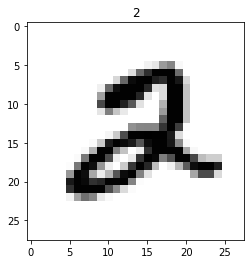

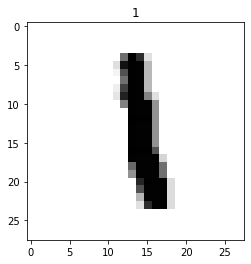

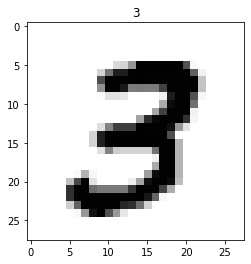

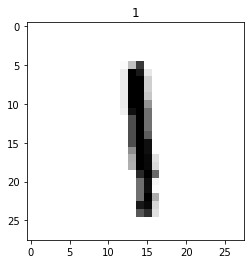

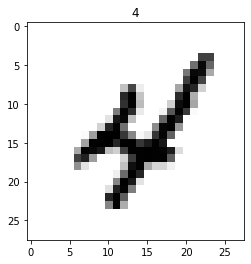

In [4]:
for i in range(10):
    plot_input_imp(i)

In [5]:
#Pre Process yhe images
#normalizing the image to[0,1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

#Reshape / expand the dimentions of images to (28,28,1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

#convert classes to one hot vectors

y_train = keras.utils.to_categorical(y_train)

y_test = keras.utils.to_categorical(y_test)

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [7]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [8]:
model = Sequential()

model.add(Conv2D(32 , (3,3), input_shape = (28,28,1) , activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3) , activation= 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [10]:
model.compile(optimizer= 'adam' , loss = keras.losses.categorical_crossentropy , metrics=['accuracy'])

In [11]:
#callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

#Earlystopping
#es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01, patience= 4, verbose= 1)

#ModelCheckpoint

mc = ModelCheckpoint('./bestmodel.h5', monitor= 'val_accuracy', verbose= 1, save_best_only= True)


cb = [mc]

Model Training

In [12]:
his = model.fit(X_train, y_train, epochs= 2, validation_split= 0.3 , callbacks = cb)

Epoch 1/2
1310/1313 [============================>.] - ETA: 0s - loss: 0.2128 - accuracy: 0.9342
Epoch 1: val_accuracy improved from -inf to 0.97600, saving model to .\bestmodel.h5
1313/1313 [==============================] - 21s 15ms/step - loss: 0.2126 - accuracy: 0.9343 - val_loss: 0.0794 - val_accuracy: 0.9760
Epoch 2/2
1310/1313 [============================>.] - ETA: 0s - loss: 0.0749 - accuracy: 0.9767
Epoch 2: val_accuracy improved from 0.97600 to 0.98150, saving model to .\bestmodel.h5
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0750 - accuracy: 0.9767 - val_loss: 0.0614 - val_accuracy: 0.9815


In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0526 - accuracy: 0.9838


[0.0525849312543869, 0.9837999939918518]

In [16]:
y_pred = model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [17]:
y_pred[0]

array([2.7635589e-09, 3.3467604e-08, 1.3857498e-05, 1.9760479e-05,
       2.7102812e-10, 3.2776910e-09, 4.6585152e-15, 9.9996614e-01,
       9.0837744e-08, 1.5588444e-07], dtype=float32)

In [18]:
np.argmax(y_pred[0])

7

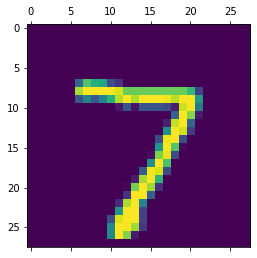

In [19]:
plt.matshow(X_test[0])

In [20]:
def find(index):
    result = np.argmax(y_pred[index])
    plt.matshow(X_test[index])
    plt.xlabel(result, size = 20)

C:\Users\prati\AppData\Local\Temp\ipykernel_7336\1361225994.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.matshow(X_test[index])


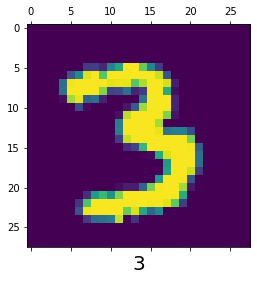

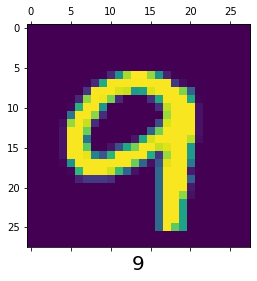

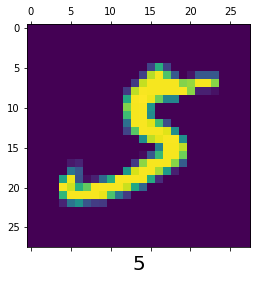

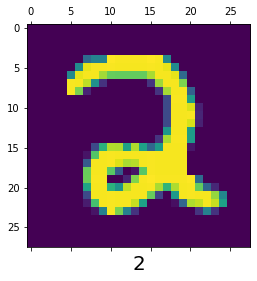

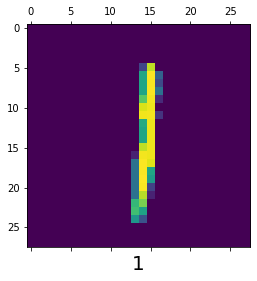

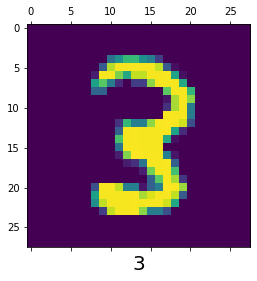

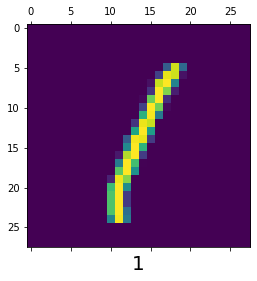

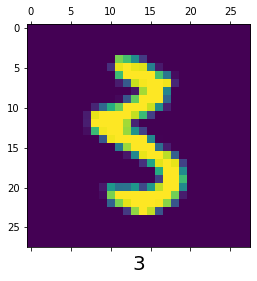

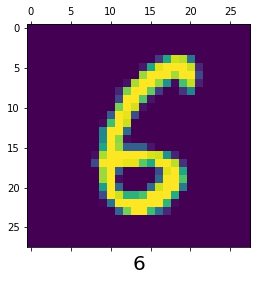

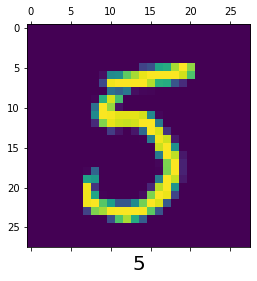

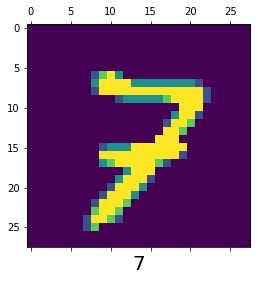

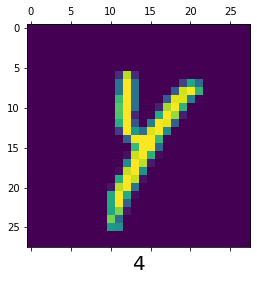

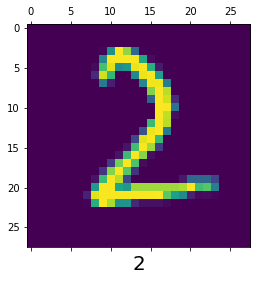

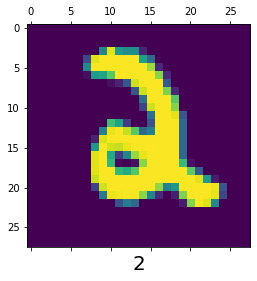

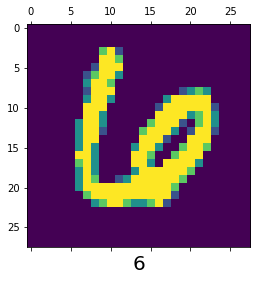

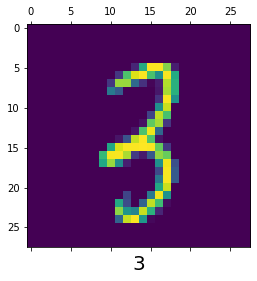

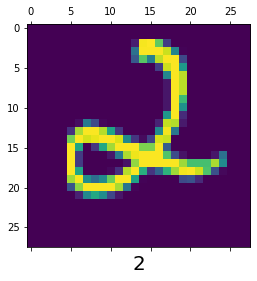

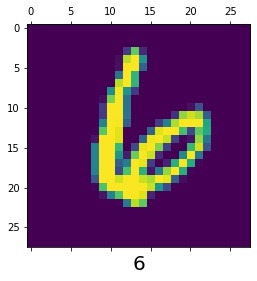

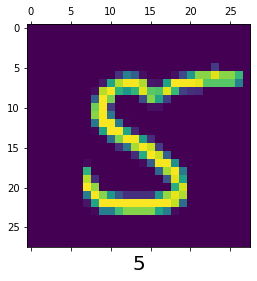

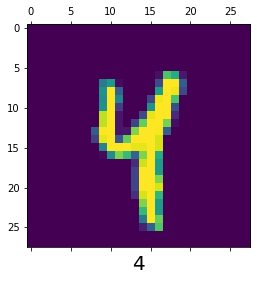

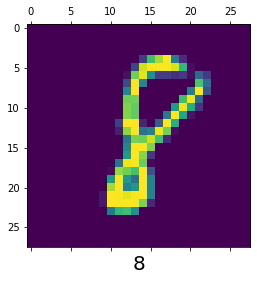

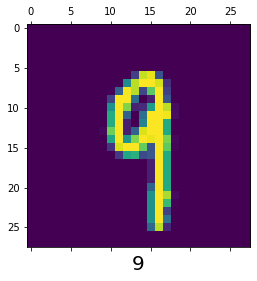

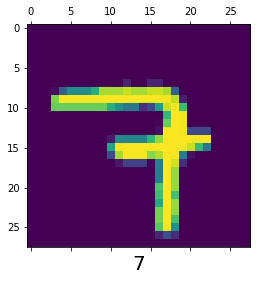

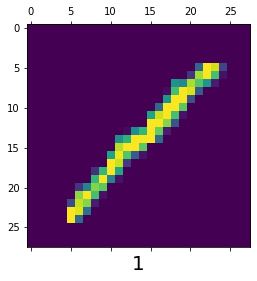

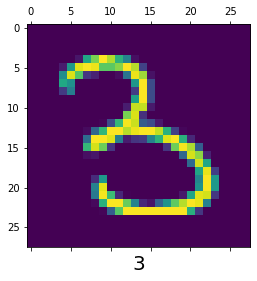

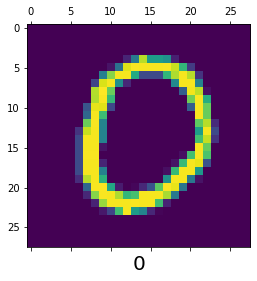

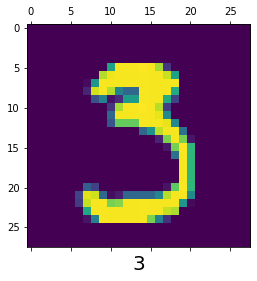

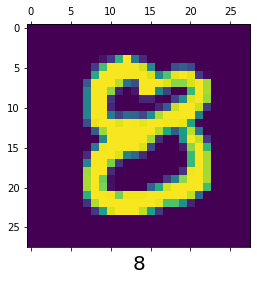

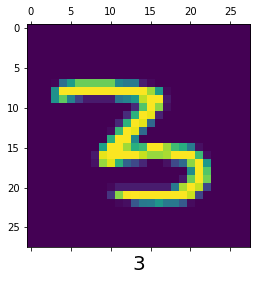

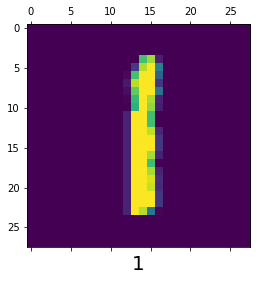

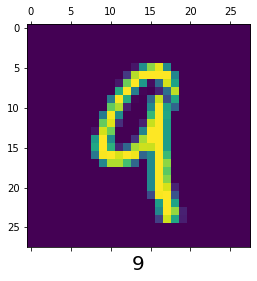

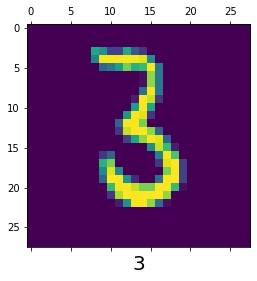

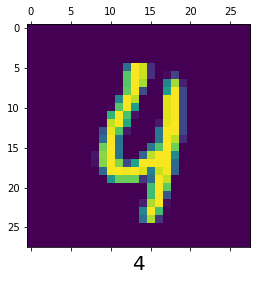

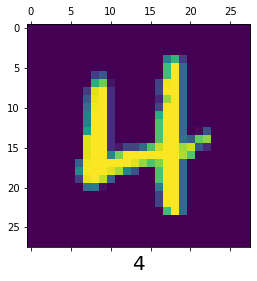

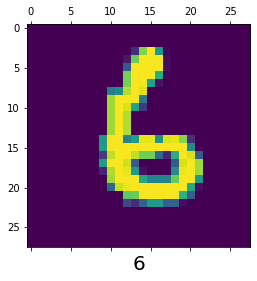

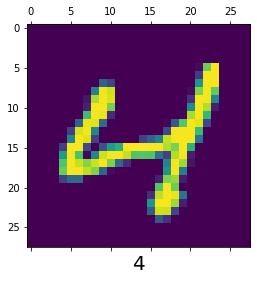

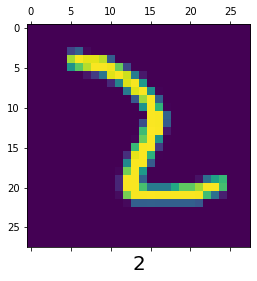

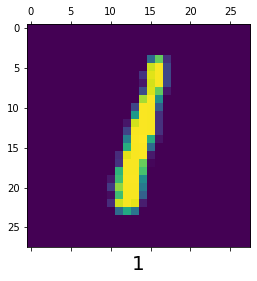

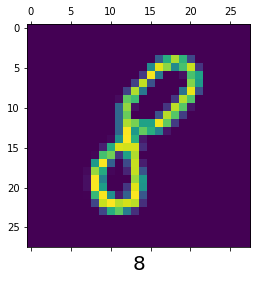

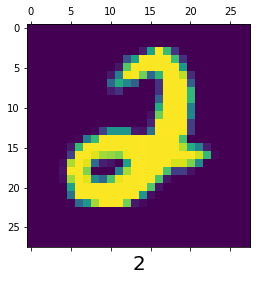

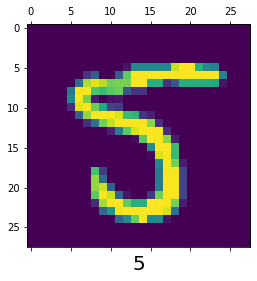

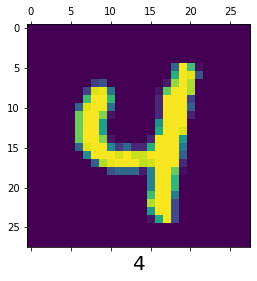

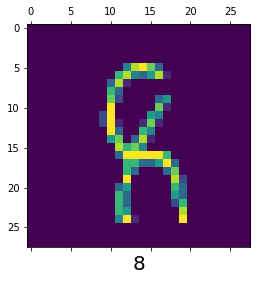

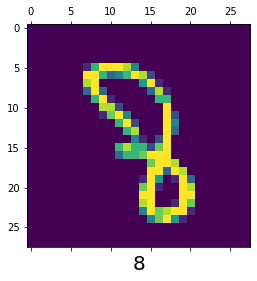

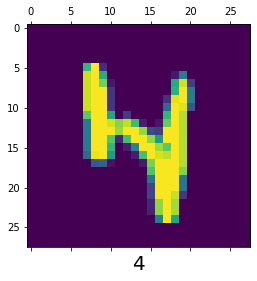

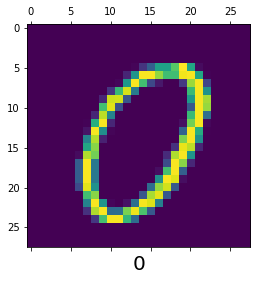

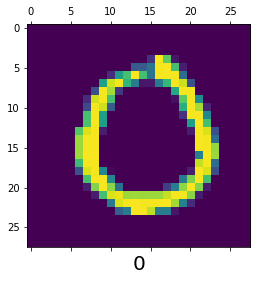

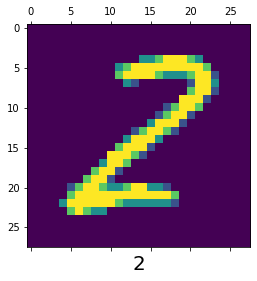

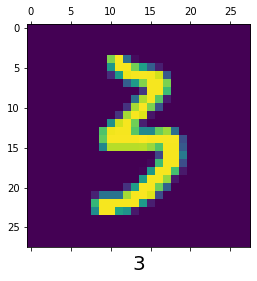

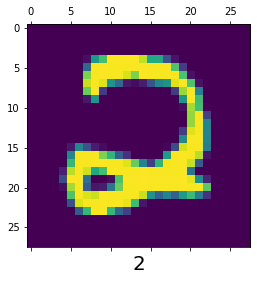

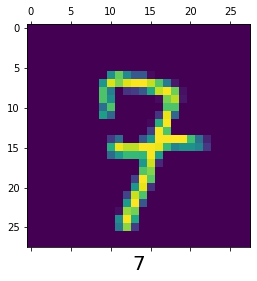

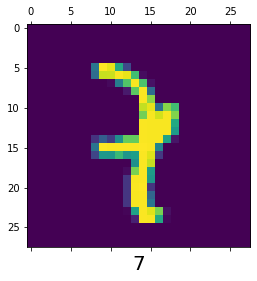

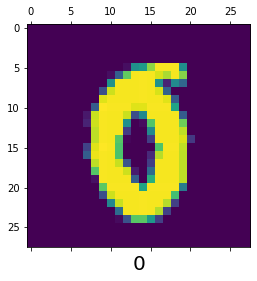

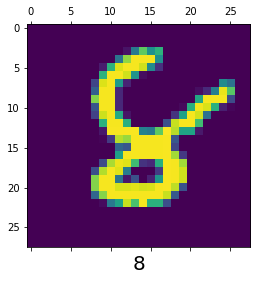

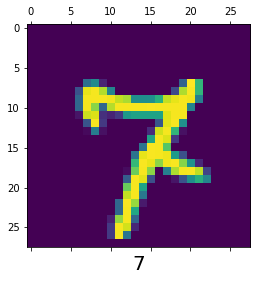

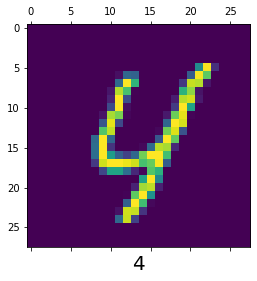

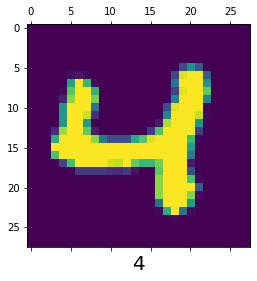

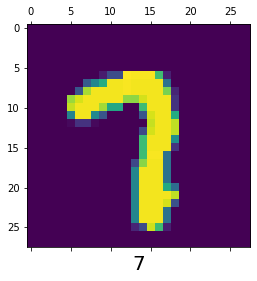

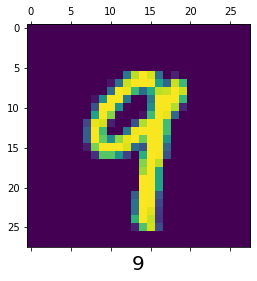

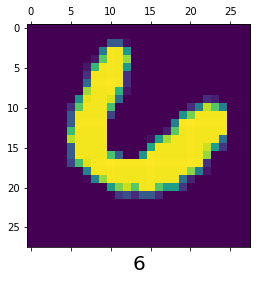

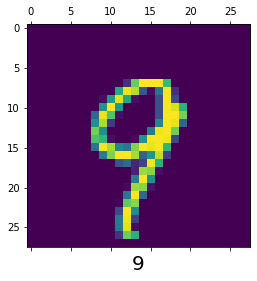

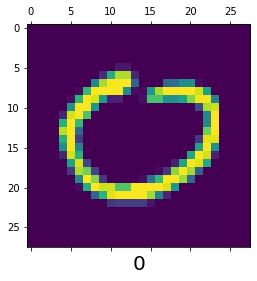

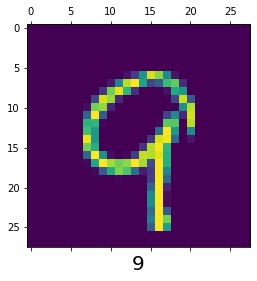

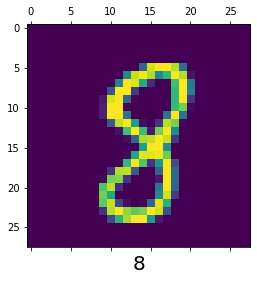

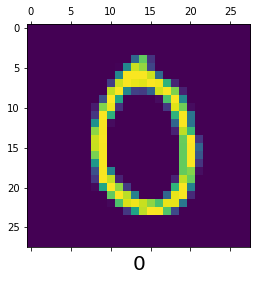

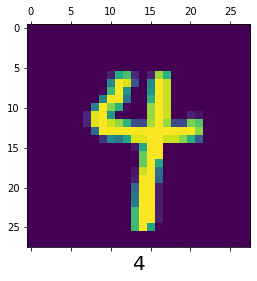

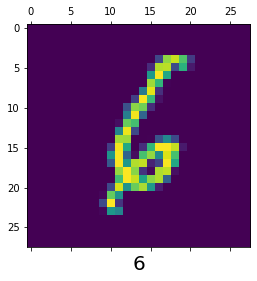

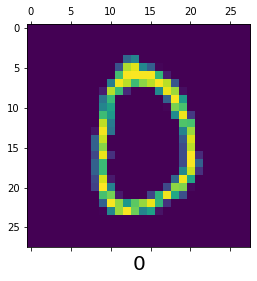

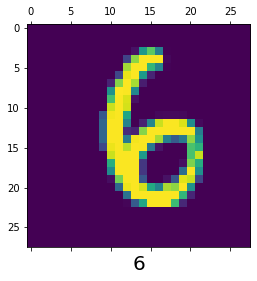

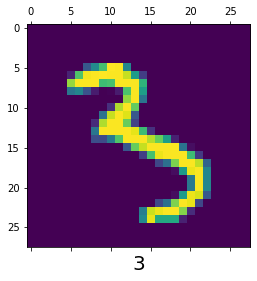

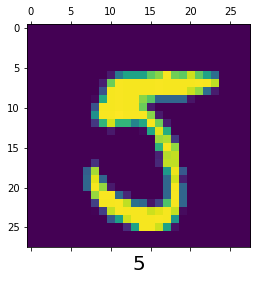

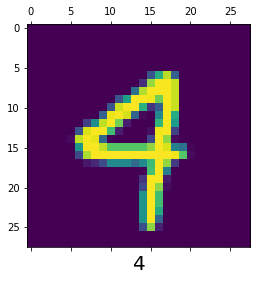

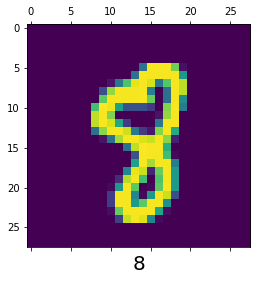

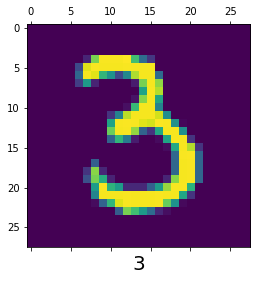

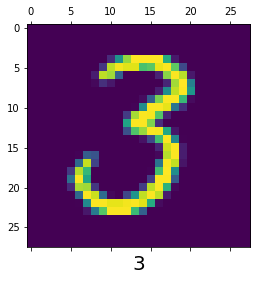

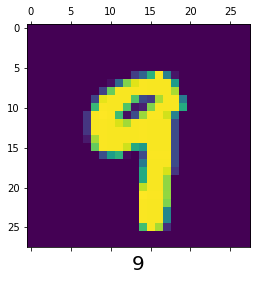

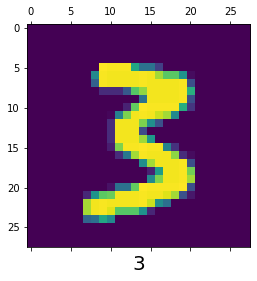

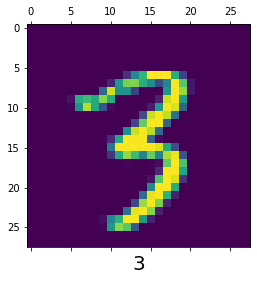

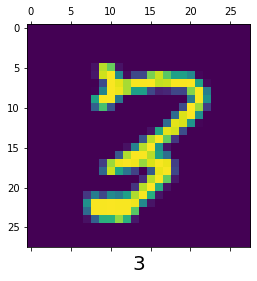

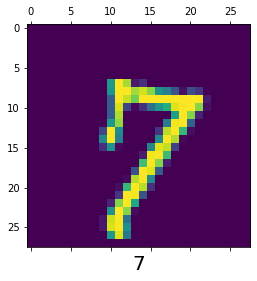

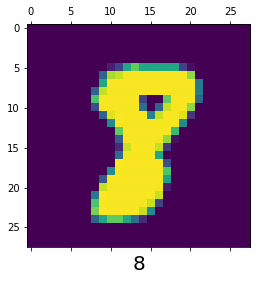

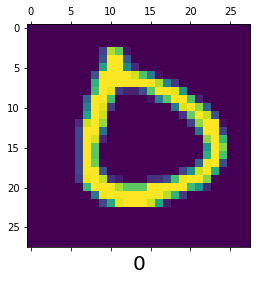

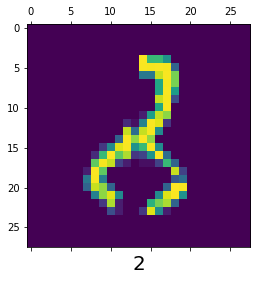

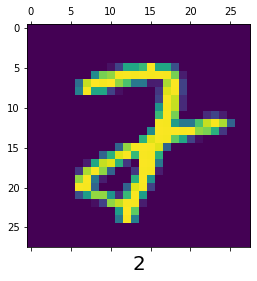

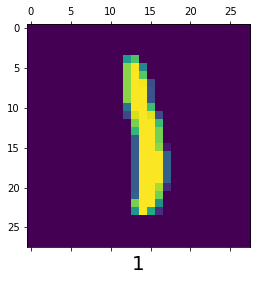

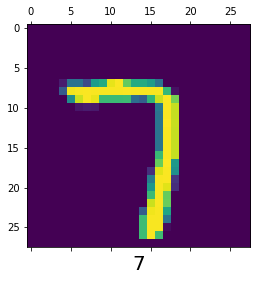

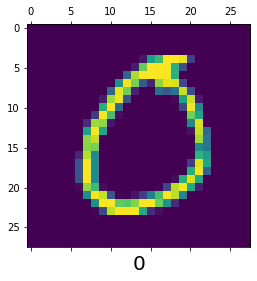

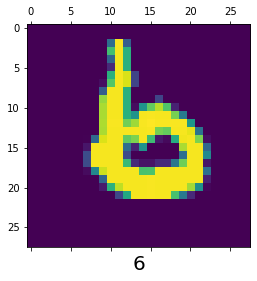

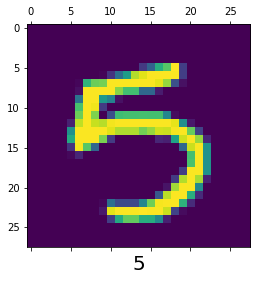

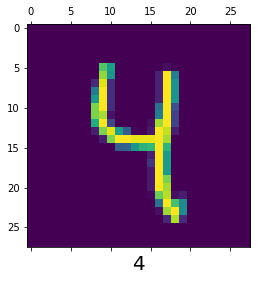

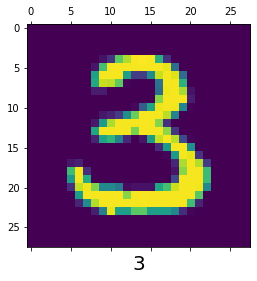

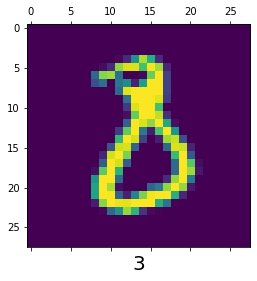

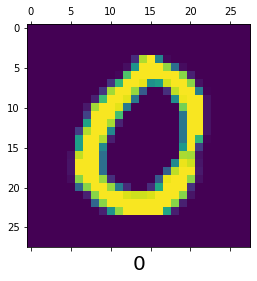

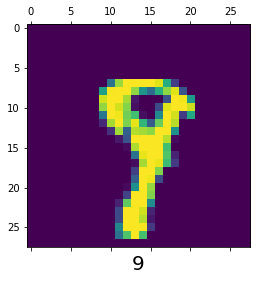

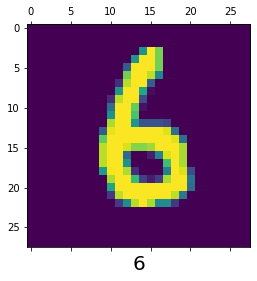

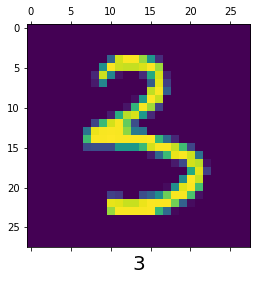

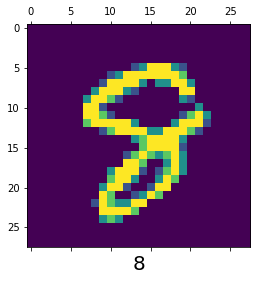

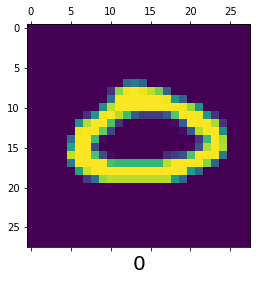

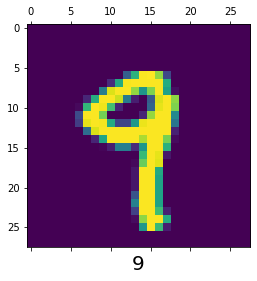

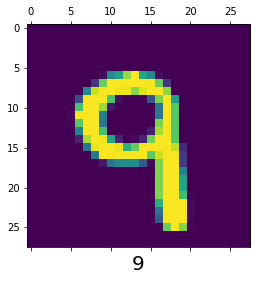

In [21]:
for i in range(500,600):
    find(i)

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
y_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
score = model.evaluate(X_test, y_test)

print(f" the model accuracy is {score[1]}")

313/313 [==============================] - 2s 6ms/step - loss: 0.0526 - accuracy: 0.9838
 the model accuracy is 0.9837999939918518
